In [1]:
#import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from IPython.display import Image
import json

# Suprimir todos os avisos em Pandas
warnings.filterwarnings('ignore', category=Warning)

In [2]:
#carregamento dos dados:
dados_ticktes = pd.read_excel("C:\Project-Kath\DataScience\Portfolio\Outliers\exportBI.xlsx")


In [3]:
dados_ticktes['Suporte']=dados_ticktes['L1']+dados_ticktes['L2']

In [4]:
padrao = r'^(\w{1,3})'
padrao2 = r'(\d{2})$'

# Extraindo as informações de mês e ano
mes = dados_ticktes['Nome do Mês'].str.extract(padrao)
ano = dados_ticktes['Ano'].astype(str).str.extract(padrao2)

# Concatenando mês e ano
dados_ticktes['Mes_Ano'] = mes + '_'+ano

In [5]:
dados_ticktes

,Ano,Nome do Mês,key,Created,Resolution,L1,L2,Suporte,Mes_Ano
0,2022,janeiro,P01232671,2021-10-18 09:20:05,2022-01-03 13:39:26,43.23,33.95,77.18,jan_22
1,2022,janeiro,P01232750,2021-12-28 15:00:00,2022-01-05 19:22:22,8.18,15.00,23.18,jan_22
2,2022,janeiro,P01232756,2022-01-11 15:20:08,2022-01-12 17:11:57,4.00,20.00,24.00,jan_22
3,2022,janeiro,P01232738,2021-12-16 14:10:34,2022-01-13 17:23:56,28.13,0.00,28.13,jan_22
4,2022,janeiro,P01232687,2021-10-26 09:40:09,2022-01-14 16:22:44,51.92,26.02,77.94,jan_22
...,...,...,...,...,...,...,...,...,...
379,2024,janeiro,P01233410,2023-08-07 11:50:23,2024-01-23 14:03:38,62.40,10.53,72.93,jan_24
380,2024,janeiro,P01233560,2024-01-23 14:48:19,2024-01-23 17:02:15,32.00,0.00,32.00,jan_24
381,2024,janeiro,P01233508,2023-11-08 19:08:35,2024-01-24 12:04:52,60.65,0.00,60.65,jan_24
382,2024,janeiro,P01233447,2023-09-15 13:40:58,2024-01-26 17:11:34,0.01,102.93,102.94,jan_24


In [6]:
df_L1=dados_ticktes.query('L1>0')
df_L2=dados_ticktes.query('L2>0')
df_Suporte=dados_ticktes.query('Suporte>0')

In [7]:
dados_ticktes

,Ano,Nome do Mês,key,Created,Resolution,L1,L2,Suporte,Mes_Ano
0,2022,janeiro,P01232671,2021-10-18 09:20:05,2022-01-03 13:39:26,43.23,33.95,77.18,jan_22
1,2022,janeiro,P01232750,2021-12-28 15:00:00,2022-01-05 19:22:22,8.18,15.00,23.18,jan_22
2,2022,janeiro,P01232756,2022-01-11 15:20:08,2022-01-12 17:11:57,4.00,20.00,24.00,jan_22
3,2022,janeiro,P01232738,2021-12-16 14:10:34,2022-01-13 17:23:56,28.13,0.00,28.13,jan_22
4,2022,janeiro,P01232687,2021-10-26 09:40:09,2022-01-14 16:22:44,51.92,26.02,77.94,jan_22
...,...,...,...,...,...,...,...,...,...
379,2024,janeiro,P01233410,2023-08-07 11:50:23,2024-01-23 14:03:38,62.40,10.53,72.93,jan_24
380,2024,janeiro,P01233560,2024-01-23 14:48:19,2024-01-23 17:02:15,32.00,0.00,32.00,jan_24
381,2024,janeiro,P01233508,2023-11-08 19:08:35,2024-01-24 12:04:52,60.65,0.00,60.65,jan_24
382,2024,janeiro,P01233447,2023-09-15 13:40:58,2024-01-26 17:11:34,0.01,102.93,102.94,jan_24


In [8]:
#Calculando as estadisticas por ano e nivel de Suporte
mean_L1_2022 = df_L1.query('Ano == 2022')['L1'].mean().round(1)
mean_L1_2023 = df_L1.query('Ano == 2023')['L1'].mean().round(1)
mean_L1_2024 = df_L1.query('Ano == 2024')['L1'].mean().round(1)

mean_L2_2022 = df_L2.query('Ano == 2022')['L2'].mean().round(1)
mean_L2_2023 = df_L2.query('Ano == 2023')['L2'].mean().round(1)
mean_L2_2024 = df_L2.query('Ano == 2024')['L2'].mean().round(1)

mean_suporte_2022 = df_Suporte.query('Ano == 2022')['Suporte'].mean().round(1)
mean_suporte_2023 = df_Suporte.query('Ano == 2023')['Suporte'].mean().round(1)
mean_suporte_2024 = df_Suporte.query('Ano == 2024')['Suporte'].mean().round(1)



dados = {
    'mean-2022': [mean_L1_2022,mean_L2_2022,mean_suporte_2022],
    'mean-2023': [mean_L1_2023,mean_L2_2023,mean_suporte_2023],
    'mean-2024':[mean_L1_2024,mean_L2_2024,mean_suporte_2024]
   
}

media_anos = pd.DataFrame(dados)
novos_nomes_indices = ['L1', 'L2', 'Suporte']
media_anos = media_anos.rename(index=dict(zip(media_anos.index, novos_nomes_indices)))


In [9]:
#colocando as estadisticas numa única variável
stats_L1=df_L1[['L1']].describe().round(1)
stats_L2=df_L2[['L2']].describe().round(1)
stats_Suporte=df_Suporte[['Suporte']].describe().round(1)
dataframes_list = [stats_L1, stats_L2, stats_Suporte]
statisticas_geral= pd.concat(dataframes_list,axis=1)
statisticas_geral=statisticas_geral.transpose()
statisticas_geral= pd.concat([statisticas_geral,media_anos],axis=1)

statisticas_geral

,count,mean,std,min,25%,50%,75%,max,mean-2022,mean-2023,mean-2024
L1,384.0,22.4,40.3,0.0,5.8,14.0,25.6,482.0,16.3,26.0,29.3
L2,246.0,50.2,59.9,0.0,12.0,28.0,68.6,349.0,40.9,56.5,67.7
Suporte,384.0,54.6,66.9,0.0,14.2,30.8,67.4,510.1,44.9,60.9,56.4


In [10]:
#histogram

def display_histogram():

    # Criar uma figura com 3 subplots
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(11, 3.5))

    # Histograma para df_L1
    sns.histplot(df_L1['L1'], bins=15, kde=True, color='skyblue', ax=ax1)
    ax1.set_title('Histograma de L1')
    ax1.set_xlabel('Duração em Dias')
    ax1.set_ylabel('Frequência')

    # Adicionar rótulos às barras em df_L1
    for p in ax1.patches:
        ax1.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                    textcoords='offset points')

    # Histograma para df_L2
    sns.histplot(df_L2['L2'], bins=15, kde=True, color='orange', ax=ax2)
    ax2.set_title('Histograma de L2')
    ax2.set_xlabel('Duração em Dias')
    ax2.set_ylabel('Frequência')

    # Adicionar rótulos às barras em df_L2
    for p in ax2.patches:
        ax2.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                    textcoords='offset points')

    # Histograma para df_Suporte
    sns.histplot(df_Suporte['Suporte'], bins=15, kde=True, color='green', ax=ax3)
    ax3.set_title('Histograma de Suporte')
    ax3.set_xlabel('Duração em Dias')
    ax3.set_ylabel('Frequência')

    # Adicionar rótulos às barras em df_Suporte
    for p in ax3.patches:
        ax3.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                    textcoords='offset points')

    # Ajustar layout para evitar sobreposição
    plt.tight_layout()


In [11]:
def display_boxplot():

    # Criar uma figura com 3 subplots
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(11, 3.5))

    # Boxplot para df_L1
    sns.boxplot(x=df_L1['L1'], color='skyblue', ax=ax1)
    ax1.set_title('Boxplot de L1')
    ax1.set_xlabel('Duração em Dias')
    ax1.set_ylabel('L1')  # Adicionar rótulo ao eixo y

    # Boxplot para df_L2
    sns.boxplot(x=df_L2['L2'], color='orange', ax=ax2)
    ax2.set_title('Boxplot de L2')
    ax2.set_xlabel('Duração em Dias')
    ax2.set_ylabel('L2')  # Adicionar rótulo ao eixo y

    # Boxplot para df_Suporte
    sns.boxplot(x=df_Suporte['Suporte'], color='green', ax=ax3)
    ax3.set_title('Boxplot de Suporte')
    ax3.set_xlabel('Duração em Dias')
    ax3.set_ylabel('Suporte')  # Adicionar rótulo ao eixo y

    # Ajustar layout para evitar sobreposição
    plt.tight_layout()


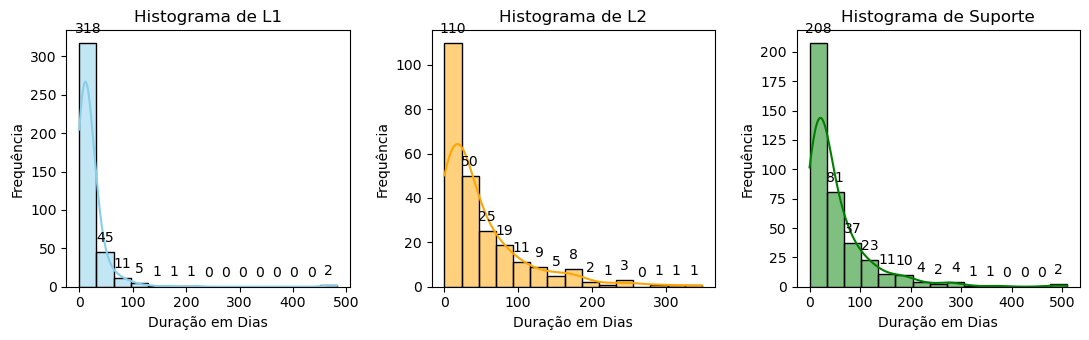

In [12]:
display_histogram()

In [13]:
statisticas_geral

,count,mean,std,min,25%,50%,75%,max,mean-2022,mean-2023,mean-2024
L1,384.0,22.4,40.3,0.0,5.8,14.0,25.6,482.0,16.3,26.0,29.3
L2,246.0,50.2,59.9,0.0,12.0,28.0,68.6,349.0,40.9,56.5,67.7
Suporte,384.0,54.6,66.9,0.0,14.2,30.8,67.4,510.1,44.9,60.9,56.4


- Em L1, L2 e Suporte podemos observar que a media é maior que a mediana, o que indica que a distribuição esta inclinada a direita (possitivamente assimétrica) ou seja a cauda direita da distribuição é mais longa que a a cauda esquerda. A maioria dos dados encontrase a esquerda da media. 

- Este tipo de distribuição pode ser afetada por valores extremos.

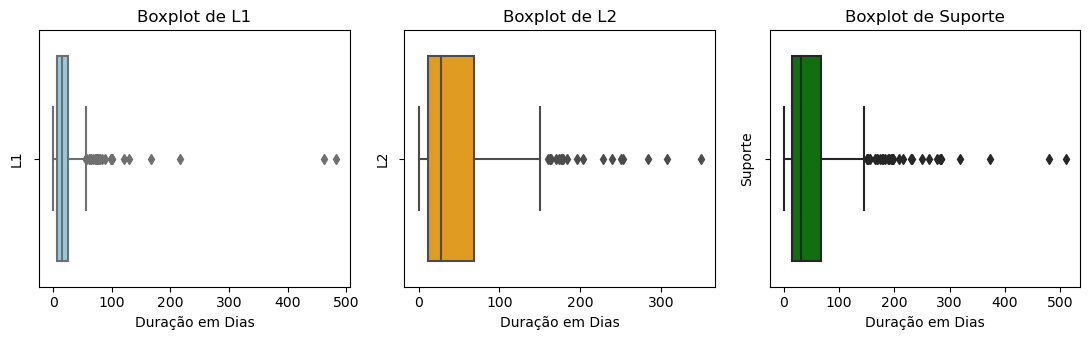

In [14]:
#visualização dos outliers 
display_boxplot()

# MÉTODOS DE EXTRAÇÃO DE OUTLIERS 

# 1er Método - Itervalo Interquartil

Através desse método, outliers são definidos matematicamente como as observações que estão abaixo (Q1 − 1,5 x IQR) do "bigode inferior" do boxplot ou acima (Q3 + 1,5 x IQR) do "bigode superior" do boxplot.

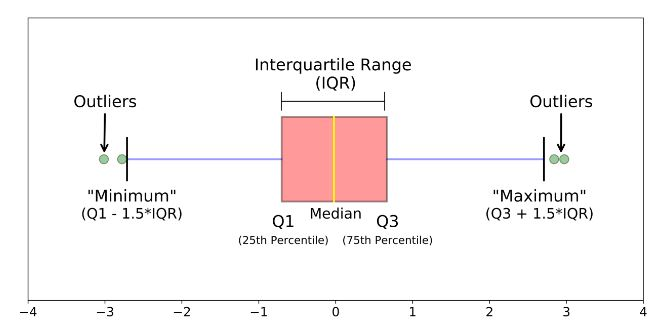

In [15]:
imagem_path = 'C:/CursoPython/sn3_4/IQR.JPG' 
Image(filename=imagem_path,width=500,height=300)

In [88]:
# Calculamos o primeiro quartil (Q1) e o terceiro quartil (Q3)
Q1_L1=df_L1['L1'].quantile(0.25).round(1)
Q1_L2=df_L2['L2'].quantile(0.25).round(1)
Q1_Suporte=df_Suporte['Suporte'].quantile(0.25).round(1)
Q3_L1=df_L1['L1'].quantile(0.75).round(1)
Q3_L2=df_L2['L2'].quantile(0.75).round(1)
Q3_Suporte=df_Suporte['Suporte'].quantile(0.75).round(1)

# Calculamos o intervalo interquartil (IQR)
IQR_L1 = (Q3_L1 - Q1_L1).round(1)
IQR_L2 = (Q3_L2 - Q1_L2).round(1)
IQR_Suporte = (Q3_Suporte - Q1_Suporte).round(1)

# Definimos limites inferior e superior para identificar outliers
lim_sup_L1 = Q1_L1+1.5 * IQR_L1
lim_sup_L2 = Q1_L2+1.5 * IQR_L2
lim_sup_Suporte = Q1_Suporte+ 1.5* IQR_Suporte
lim_inf_L1 = Q1_L1-1.5 * IQR_L1
lim_inf_L2 = Q1_L2-1.5 * IQR_L2
lim_inf_Suporte = Q1_Suporte-1.5 * IQR_Suporte

#Remover os outliers com base nos limites
df_L1_1erMetodo= df_L1[(df_L1['L1'] >= lim_inf_L1) & (df_L1['L1']  <= lim_sup_L1)]
df_L2_1erMetodo= df_L2[(df_L2['L2'] >= lim_inf_L2) & (df_L2['L2']  <= lim_sup_L2)]
df_Suporte_1erMetodo= df_Suporte[(df_Suporte['Suporte'] >= lim_inf_Suporte) & (df_Suporte['Suporte']  <= lim_sup_Suporte)]

In [17]:
#calculo de estatisticas 1er método
stats_L1=df_L1_1erMetodo[['L1']].describe().round(1)
stats_L2=df_L2_1erMetodo[['L2']].describe().round(1)
stats_Suporte=df_Suporte_1erMetodo[['Suporte']].describe().round(1)
dataframes_list = [stats_L1, stats_L2, stats_Suporte]
statisticas_1ermetodo= pd.concat(dataframes_list,axis=1)


In [18]:
#colocando as estadisticas em uma unica variavel
dados = {
    'Lim Inferior': [lim_inf_L1, lim_inf_L2, lim_inf_Suporte],
    'Lim Superior': [lim_sup_L1, lim_sup_L2, lim_sup_Suporte],
    'Qtd Outliers':[statisticas_geral['count'].loc['L1']-statisticas_1ermetodo['L1'].loc['count'],
                    statisticas_geral['count'].loc['L2']-statisticas_1ermetodo['L2'].loc['count'],
                    statisticas_geral['count'].loc['Suporte']-statisticas_1ermetodo['Suporte'].loc['count']],
    '%Outliers':[(statisticas_geral['count'].loc['L1']-statisticas_1ermetodo['L1'].loc['count'])/statisticas_geral['count'].loc['L1'],
                    (statisticas_geral['count'].loc['L2']-statisticas_1ermetodo['L2'].loc['count'])/statisticas_geral['count'].loc['L2'],
                    (statisticas_geral['count'].loc['Suporte']-statisticas_1ermetodo['Suporte'].loc['count'])/statisticas_geral['count'].loc['Suporte']]
}

valores_1ermetodo = pd.DataFrame(dados)

# Alterar os nomes dos índices (linhas)
novos_nomes_indices = ['L1', 'L2', 'Suporte']
valores_1ermetodo = valores_1ermetodo.rename(index=dict(zip(valores_1ermetodo.index, novos_nomes_indices)))
statisticas_1ermetodo= pd.concat([statisticas_1ermetodo.transpose(),valores_1ermetodo],axis=1)

In [19]:
meaan1ro_L1_2022 = df_L1_1erMetodo.query('Ano == 2022')['L1'].mean().round(1)
mean1ro_L1_2023 = df_L1_1erMetodo.query('Ano == 2023')['L1'].mean().round(1)
mean1ro_L1_2024 = df_L1_1erMetodo.query('Ano == 2024')['L1'].mean().round(1)

mean1ro_L2_2022 = df_L2_1erMetodo.query('Ano == 2022')['L2'].mean().round(1)
mean1ro_L2_2023 = df_L2_1erMetodo.query('Ano == 2023')['L2'].mean().round(1)
mean1ro_L2_2024 = df_L2_1erMetodo.query('Ano == 2024')['L2'].mean().round(1)

mean1ro_suporte_2022 = df_Suporte_1erMetodo.query('Ano == 2022')['Suporte'].mean().round(1)
mean1ro_suporte_2023 = df_Suporte_1erMetodo.query('Ano == 2023')['Suporte'].mean().round(1)
mean1ro_suporte_2024 = df_Suporte_1erMetodo.query('Ano == 2024')['Suporte'].mean().round(1)



dados = {
    'mean-2022': [mean1ro_L1_2023,mean1ro_L2_2022,mean1ro_suporte_2022],
    'mean-2023': [mean1ro_L1_2023,mean1ro_L2_2023,mean1ro_suporte_2023],
    'mean-2024':[mean1ro_L1_2024,mean1ro_L2_2024,mean1ro_suporte_2024]
   
}

media_anos = pd.DataFrame(dados)
novos_nomes_indices = ['L1', 'L2', 'Suporte']
media_anos1ro = media_anos.rename(index=dict(zip(media_anos.index, novos_nomes_indices)))


In [20]:
statisticas_1ermetodo= pd.concat([statisticas_1ermetodo,media_anos1ro],axis=1)
ordem=['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'mean-2022', 'mean-2023', 'mean-2024','Lim Inferior', 'Lim Superior', 'Qtd Outliers', '%Outliers']
statisticas_1ermetodo=statisticas_1ermetodo[ordem]
statisticas_1ermetodo

,count,mean,std,min,25%,50%,75%,max,mean-2022,mean-2023,mean-2024,Lim Inferior,Lim Superior,Qtd Outliers,%Outliers
L1,332.0,13.1,9.9,0.0,4.8,11.4,20.8,35.2,14.1,14.1,14.7,-23.9,35.5,52.0,0.135417
L2,207.0,28.6,25.0,0.0,9.0,21.0,43.4,96.9,30.9,26.1,42.4,-72.9,96.9,39.0,0.158537
Suporte,318.0,30.5,23.3,0.0,11.5,25.1,43.2,90.7,31.8,29.3,34.0,-65.6,94.0,66.0,0.171875


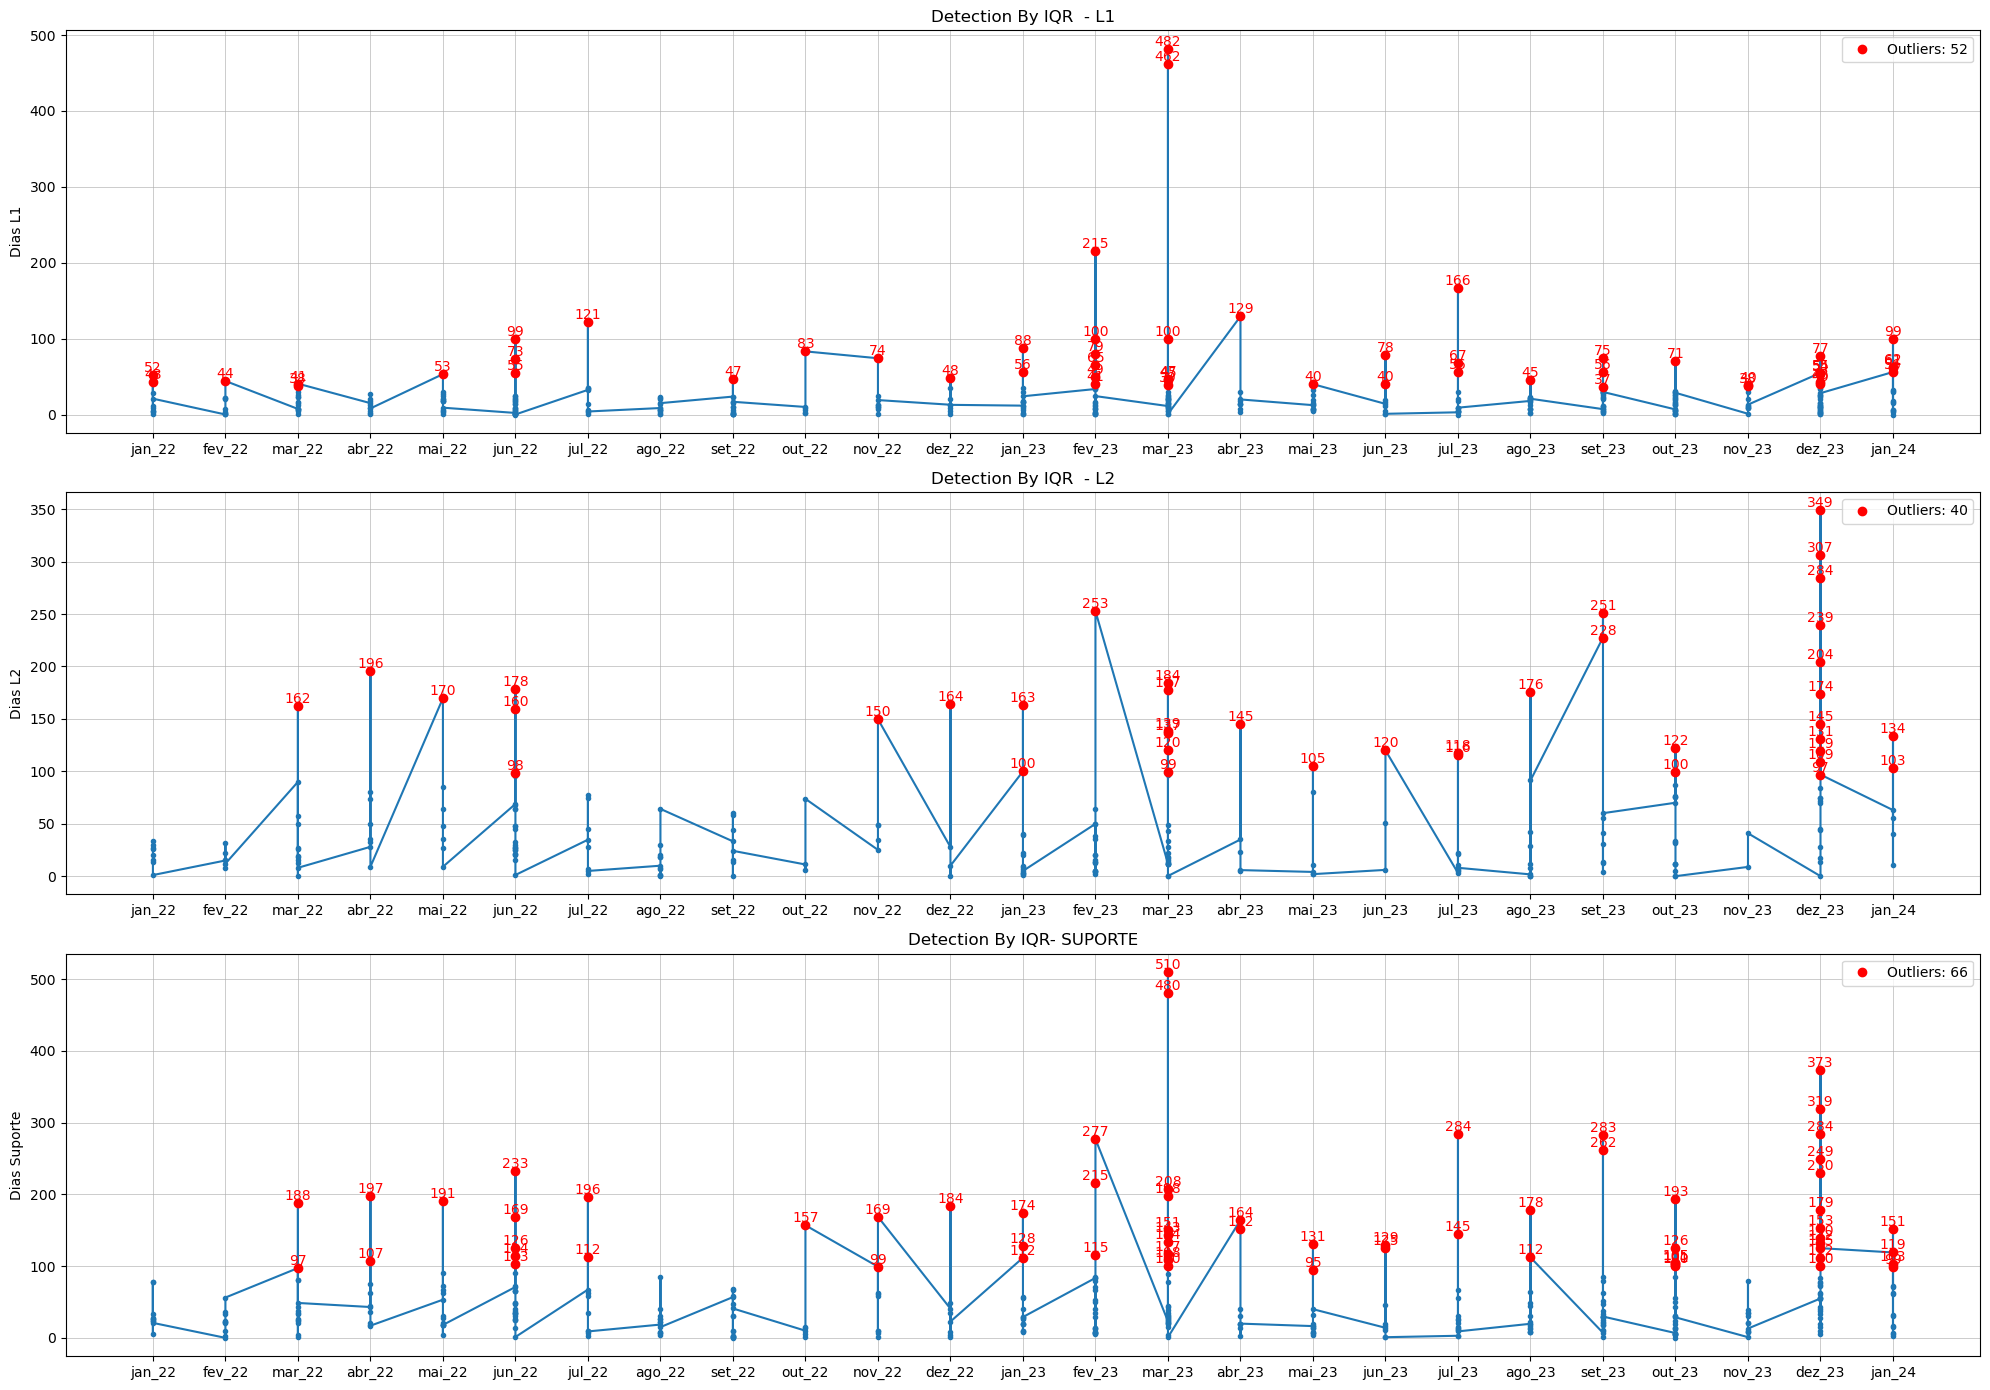

In [94]:
def plot_outliers_IQR(df, column, lim, title, ax):
    outliers = df.loc[df[column] >= lim]

    # Adicionando 'Ano_mes' como eixo x
    ax.plot(df['Mes_Ano'], df[column], marker='.')
    ax.plot(outliers['Mes_Ano'], outliers[column], 'o', color='red', label=f"Outliers: {outliers[[column]].count().values[0]}")
    ax.set_title(title)
    ax.grid(linewidth=0.5, alpha=0.9)
    ax.set_ylabel(f'Dias {column}')
    ax.legend()

    # Adicionar rótulos apenas aos outliers
    for index, row in outliers.iterrows():
        label = f"{row[column]:.0f}"  # Arredondar para uma casa decimal
        ax.text(row['Mes_Ano'], row[column], label, color='red', ha='center', va='bottom')

fig, axs = plt.subplots(3, 1, figsize=(20, 14))

# Usando a função para plotar gráficos
plot_outliers_IQR(df_L1 , 'L1',  lim_sup_L1,'Detection By IQR  - L1', axs[0])
plot_outliers_IQR(df_L2, 'L2', lim_sup_L2, 'Detection By IQR  - L2', axs[1])
plot_outliers_IQR(df_Suporte, 'Suporte', lim_sup_Suporte, 'Detection By IQR- SUPORTE', axs[2])

# Ajustar layout para evitar sobreposição de títulos
plt.tight_layout()

# Exibir os subplots
plt.show()

In [21]:
#histogram

def display_histogram_1ermetodo():

    # Criar uma figura com 3 subplots
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(11, 3.5))

    # Histograma para df_L1
    sns.histplot(df_L1_1erMetodo['L1'], bins=15, kde=True, color='skyblue', ax=ax1)
    ax1.set_title('Histograma de L1 - Sem Outliers')
    ax1.set_xlabel('Duração em Dias')
    ax1.set_ylabel('Frequência')

    # Adicionar rótulos às barras em df_L1
    for p in ax1.patches:
        ax1.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                    textcoords='offset points')

    # Histograma para df_L2
    sns.histplot(df_L2_1erMetodo['L2'], bins=15, kde=True, color='orange', ax=ax2)
    ax2.set_title('Histograma de L2 - Sem Outliers')
    ax2.set_xlabel('Duração em Dias')
    ax2.set_ylabel('Frequência')

    # Adicionar rótulos às barras em df_L2
    for p in ax2.patches:
        ax2.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                    textcoords='offset points')

    # Histograma para df_Suporte
    sns.histplot(df_Suporte_1erMetodo['Suporte'], bins=15, kde=True, color='green', ax=ax3)
    ax3.set_title('Histograma de Suporte - Sem Outliers')
    ax3.set_xlabel('Duração em Dias')
    ax3.set_ylabel('Frequência')

    # Adicionar rótulos às barras em df_Suporte
    for p in ax3.patches:
        ax3.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                    textcoords='offset points')

    # Ajustar layout para evitar sobreposição
    plt.tight_layout()

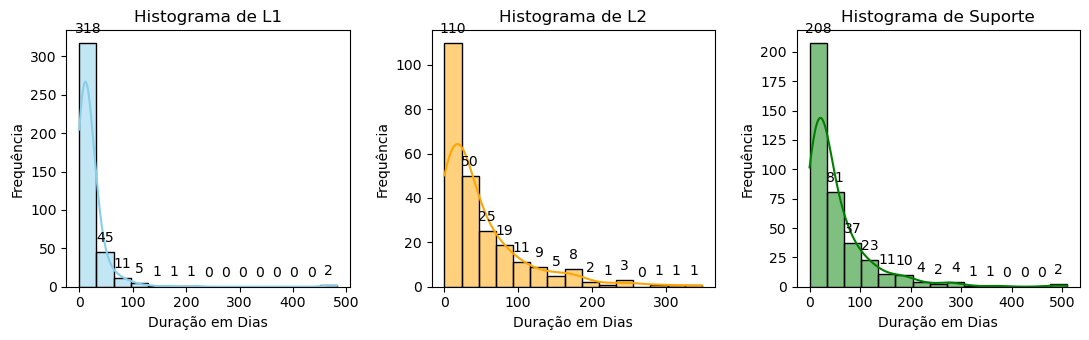

In [22]:
#ANTES
display_histogram()

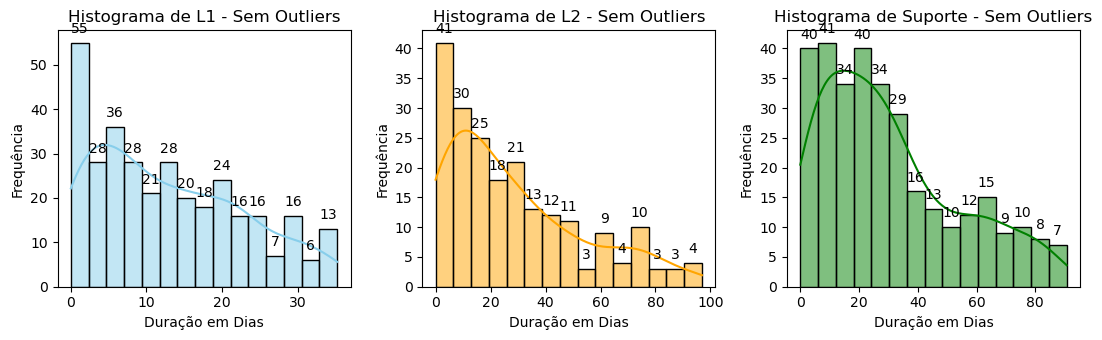

In [23]:
#DEPOIS
display_histogram_1ermetodo()

In [24]:
statisticas_1ermetodo

,count,mean,std,min,25%,50%,75%,max,mean-2022,mean-2023,mean-2024,Lim Inferior,Lim Superior,Qtd Outliers,%Outliers
L1,332.0,13.1,9.9,0.0,4.8,11.4,20.8,35.2,14.1,14.1,14.7,-23.9,35.5,52.0,0.135417
L2,207.0,28.6,25.0,0.0,9.0,21.0,43.4,96.9,30.9,26.1,42.4,-72.9,96.9,39.0,0.158537
Suporte,318.0,30.5,23.3,0.0,11.5,25.1,43.2,90.7,31.8,29.3,34.0,-65.6,94.0,66.0,0.171875


- O IQR é menos sensível a outliers, isso torna robusto em situações em que existem valores extremos. 
- Como o método se concentra no quartil não é influenciado pela forma exacta da distribuição.


# 2do Método Z-Core

O método Z-Score (ou escore Z) é uma medida estatística que indica quantos desvios padrão um ponto de dados está da média 
de um conjunto de dados.

##### Z = (X – μ) / σ
– μ é a média do conjunto de dados

– σ é o desvio padrão do conjunto de dados


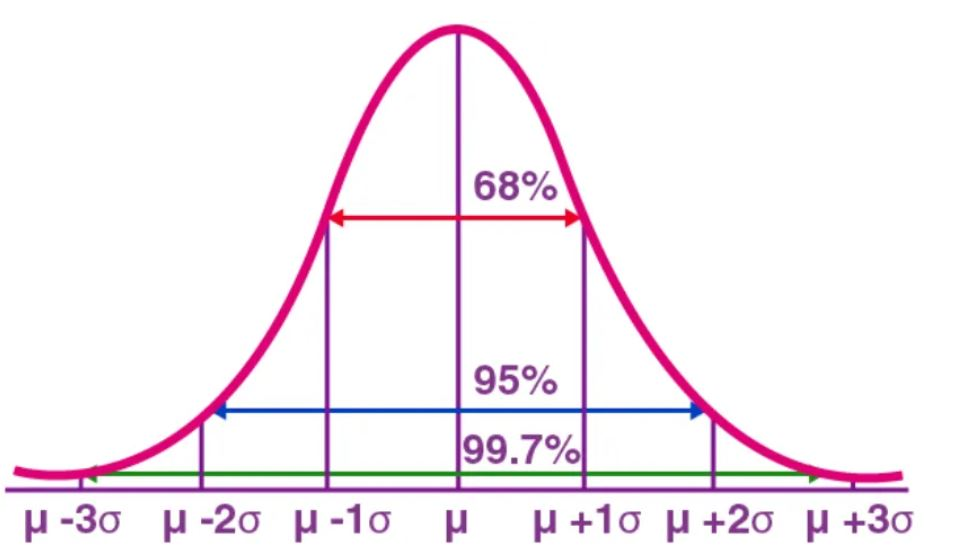

In [25]:
imagem_path = 'C:/CursoPython/sn3_4/zcore.JPG' 
Image(filename=imagem_path,width=500,height=300)

In [26]:
#Calculamos a média e o desvio estandar 
media_L1=statisticas_geral['mean'].loc['L1']
std_L1=statisticas_geral['std'].loc['L1']
media_L2=statisticas_geral['mean'].loc['L2']
std_L2=statisticas_geral['std'].loc['L2']
media_Suporte=statisticas_geral['mean'].loc['Suporte']
std_Suporte=statisticas_geral['std'].loc['Suporte']
# Definimos limites inferior e superior para identificar outliers
upper_L1=media_L1+3*std_L1
lower_L1=media_L1-3*std_L1
upper_L2=media_L2+3*std_L2
lower_L2=media_L2-3*std_L2
upper_Suporte=media_Suporte+3*std_Suporte
lower_Suporte=media_Suporte-3*std_Suporte
#Remover os outliers com base nos limites
df_L1_2doMetodo= df_L1[(df_L1['L1'] >= lower_L1) & (df_L1['L1']  <= upper_L1)]
df_L2_2doMetodo= df_L2[(df_L2['L2'] >= lower_L2) & (df_L2['L2']  <= upper_L2)]
df_Suporte_2doMetodo= df_Suporte[(df_Suporte['Suporte'] >= lower_Suporte) & (df_Suporte['Suporte']  <= upper_Suporte)]


In [27]:
#calculo de estatisticas 2do método
stats_L1=df_L1_2doMetodo[['L1']].describe().round(1)
stats_L2=df_L2_2doMetodo[['L2']].describe().round(1)
stats_Suporte=df_Suporte_2doMetodo[['Suporte']].describe().round(1)
dataframes_list = [stats_L1, stats_L2, stats_Suporte]
statisticas_2dometodo= pd.concat(dataframes_list,axis=1)

In [28]:
dados = {
    'Lim Inferior': [lower_L1, lower_L2, lower_Suporte],
    'Lim Superior': [upper_L1, upper_L2, upper_Suporte],
    'Qtd Outliers':[statisticas_geral['count'].loc['L1']-statisticas_2dometodo['L1'].loc['count'],
                    statisticas_geral['count'].loc['L2']-statisticas_2dometodo['L2'].loc['count'],
                    statisticas_geral['count'].loc['Suporte']-statisticas_2dometodo['Suporte'].loc['count']],
    '%Outliers':[(statisticas_geral['count'].loc['L1']-statisticas_2dometodo['L1'].loc['count'])/statisticas_geral['count'].loc['L1'],
                    (statisticas_geral['count'].loc['L2']-statisticas_2dometodo['L2'].loc['count'])/statisticas_geral['count'].loc['L2'],
                    (statisticas_geral['count'].loc['Suporte']-statisticas_2dometodo['Suporte'].loc['count'])/statisticas_geral['count'].loc['Suporte']]
}

valores_2dometodo = pd.DataFrame(dados)

# Alterar os nomes dos índices (linhas)
novos_nomes_indices = ['L1', 'L2', 'Suporte']
valores_2dometodo = valores_2dometodo.rename(index=dict(zip(valores_2dometodo.index, novos_nomes_indices)))
statisticas_2dometodo= pd.concat([statisticas_2dometodo.transpose(),valores_2dometodo],axis=1)

statisticas_2dometodo


,count,mean,std,min,25%,50%,75%,max,Lim Inferior,Lim Superior,Qtd Outliers,%Outliers
L1,380.0,19.2,20.2,0.0,5.7,13.9,25.0,129.3,-98.5,143.3,4.0,0.010417
L2,240.0,44.4,47.7,0.0,11.1,27.0,64.0,227.6,-129.5,229.9,6.0,0.024390
Suporte,375.0,47.7,48.7,0.0,14.0,30.1,64.7,249.4,-146.1,255.3,9.0,0.023438


In [29]:
meaan2do_L1_2022 = df_L1_2doMetodo.query('Ano == 2022')['L1'].mean().round(1)
mean2do_L1_2023 = df_L1_2doMetodo.query('Ano == 2023')['L1'].mean().round(1)
mean2do_L1_2024 = df_L1_2doMetodo.query('Ano == 2024')['L1'].mean().round(1)

mean2do_L2_2022 = df_L2_2doMetodo.query('Ano == 2022')['L2'].mean().round(1)
mean2do_L2_2023 = df_L2_2doMetodo.query('Ano == 2023')['L2'].mean().round(1)
mean2do_L2_2024 = df_L2_2doMetodo.query('Ano == 2024')['L2'].mean().round(1)

mean2do_suporte_2022 = df_Suporte_2doMetodo.query('Ano == 2022')['Suporte'].mean().round(1)
mean2do_suporte_2023 = df_Suporte_2doMetodo.query('Ano == 2023')['Suporte'].mean().round(1)
mean2do_suporte_2024 = df_Suporte_2doMetodo.query('Ano == 2024')['Suporte'].mean().round(1)



dados = {
    'mean-2022': [mean2do_L1_2023,mean2do_L2_2022,mean2do_suporte_2022],
    'mean-2023': [mean2do_L1_2023,mean2do_L2_2023,mean2do_suporte_2023],
    'mean-2024':[mean2do_L1_2024,mean2do_L2_2024,mean2do_suporte_2024]
   
}

media_anos = pd.DataFrame(dados)
novos_nomes_indices = ['L1', 'L2', 'Suporte']
media_anos2do = media_anos.rename(index=dict(zip(media_anos.index, novos_nomes_indices)))
media_anos2do

,mean-2022,mean-2023,mean-2024
L1,20.4,20.4,29.3
L2,40.9,46.2,67.7
Suporte,44.9,49.0,56.4


In [30]:
statisticas_2dometodo= pd.concat([statisticas_2dometodo,media_anos2do],axis=1)
ordem=['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'mean-2022', 'mean-2023', 'mean-2024','Lim Inferior', 'Lim Superior', 'Qtd Outliers', '%Outliers']
statisticas_2dometodo=statisticas_2dometodo[ordem]

statisticas_2dometodo

,count,mean,std,min,25%,50%,75%,max,mean-2022,mean-2023,mean-2024,Lim Inferior,Lim Superior,Qtd Outliers,%Outliers
L1,380.0,19.2,20.2,0.0,5.7,13.9,25.0,129.3,20.4,20.4,29.3,-98.5,143.3,4.0,0.010417
L2,240.0,44.4,47.7,0.0,11.1,27.0,64.0,227.6,40.9,46.2,67.7,-129.5,229.9,6.0,0.024390
Suporte,375.0,47.7,48.7,0.0,14.0,30.1,64.7,249.4,44.9,49.0,56.4,-146.1,255.3,9.0,0.023438


In [31]:
#histogram

def display_histogram_2dometodo():

    # Criar uma figura com 3 subplots
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(11, 3.5))

    # Histograma para df_L1
    sns.histplot(df_L1_2doMetodo['L1'], bins=15, kde=True, color='skyblue', ax=ax1)
    ax1.set_title('Histograma de L1 - Sem Outliers')
    ax1.set_xlabel('Duração em Dias')
    ax1.set_ylabel('Frequência')

    # Adicionar rótulos às barras em df_L1
    for p in ax1.patches:
        ax1.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                    textcoords='offset points')

    # Histograma para df_L2
    sns.histplot(df_L2_2doMetodo['L2'], bins=15, kde=True, color='orange', ax=ax2)
    ax2.set_title('Histograma de L2 - Sem Outliers')
    ax2.set_xlabel('Duração em Dias')
    ax2.set_ylabel('Frequência')

    # Adicionar rótulos às barras em df_L2
    for p in ax2.patches:
        ax2.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                    textcoords='offset points')

    # Histograma para df_Suporte
    sns.histplot(df_Suporte_2doMetodo['Suporte'], bins=15, kde=True, color='green', ax=ax3)
    ax3.set_title('Histograma de Suporte - Sem Outliers')
    ax3.set_xlabel('Duração em Dias')
    ax3.set_ylabel('Frequência')

    # Adicionar rótulos às barras em df_Suporte
    for p in ax3.patches:
        ax3.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                    textcoords='offset points')

    # Ajustar layout para evitar sobreposição
    plt.tight_layout()


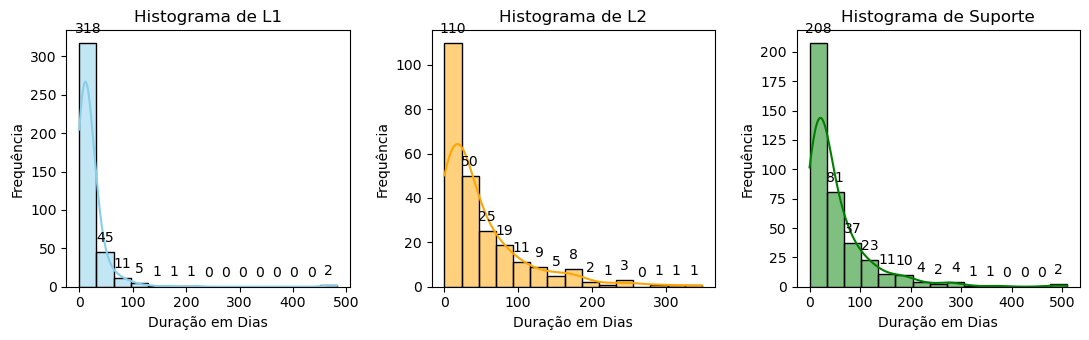

In [32]:
#ANTES
display_histogram()

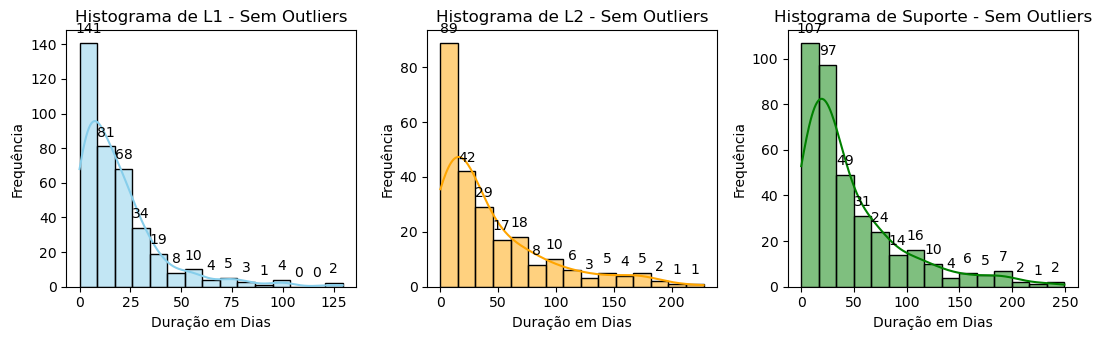

In [33]:
#DEPOIS
display_histogram_2dometodo()

In [34]:
#DEPOIS
statisticas_2dometodo

,count,mean,std,min,25%,50%,75%,max,mean-2022,mean-2023,mean-2024,Lim Inferior,Lim Superior,Qtd Outliers,%Outliers
L1,380.0,19.2,20.2,0.0,5.7,13.9,25.0,129.3,20.4,20.4,29.3,-98.5,143.3,4.0,0.010417
L2,240.0,44.4,47.7,0.0,11.1,27.0,64.0,227.6,40.9,46.2,67.7,-129.5,229.9,6.0,0.024390
Suporte,375.0,47.7,48.7,0.0,14.0,30.1,64.7,249.4,44.9,49.0,56.4,-146.1,255.3,9.0,0.023438



- Este tipo de método é recomendado quando temos uma distribuição totalmente normal ou proxima a ela. 
- Este método envolve a média e o desvio padrão, se houver outliers extremos, especialmente em distribuição assimétricas como as que temos, pode afetar significativqamente a estimação dos parametros.

# 3er Método - Machine Learning Isolation Forest

É um algoritmo de machine learning usado para deteção de anomalias. Este modelo é baseado em particiones recursivas dos dados, para isolar anomalias.

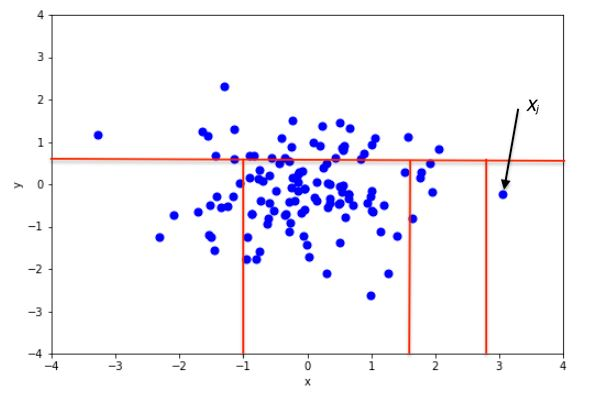

In [35]:
imagem_path = 'C:/CursoPython/sn3_4/IsolationForest.JPG' 
Image(filename=imagem_path,width=500,height=300)

In [73]:
from sklearn.ensemble import IsolationForest
import numpy as np
random_state = np.random.RandomState(42)

# Função para treinar o modelo e adicionar pontuações e rótulos ao DataFrame
def treinar_modelo_e_adicionar_resultados(df, coluna_nome):
    # Treinamento do modelo
    model = IsolationForest(n_estimators=100, max_samples='auto', contamination='auto', random_state=random_state)
    model.fit(df[[coluna_nome]])
    # n_stimators -> the number of trees that will get build in the forest, default is 100
    #max_samples-> is the number of samples to be drawn to train each base estimator. default is auto
    #contamination-> this is a parameter that the algorithm is quite sensitive tp, it refers to the expected proportion of outliers in the dataset, default is auto.

    # Obtendo pontuações de anomalia e rótulos
    df['scores_' + coluna_nome] = model.decision_function(df[[coluna_nome]])
    df['anomaly_' + coluna_nome] = model.predict(df[[coluna_nome]])
    #predict-> to find outliers
   # print( model.a)
    return df

# Treinando modelos e adicionando resultados para cada DataFrame
df_L1 = treinar_modelo_e_adicionar_resultados(df_L1, 'L1')
df_L2 = treinar_modelo_e_adicionar_resultados(df_L2, 'L2')
df_Suporte = treinar_modelo_e_adicionar_resultados(df_Suporte, 'Suporte')

#Outliers assigned a value of -1, while the other point are assigned value of.

#Remover os outliers com base na coluna anomaly 
df_L1_3erMetodo= df_L1.query('anomaly_L1==1')
df_L2_3erMetodo= df_L2.query('anomaly_L2==1')
df_Suporte_3erMetodo= df_Suporte.query('anomaly_Suporte==1')

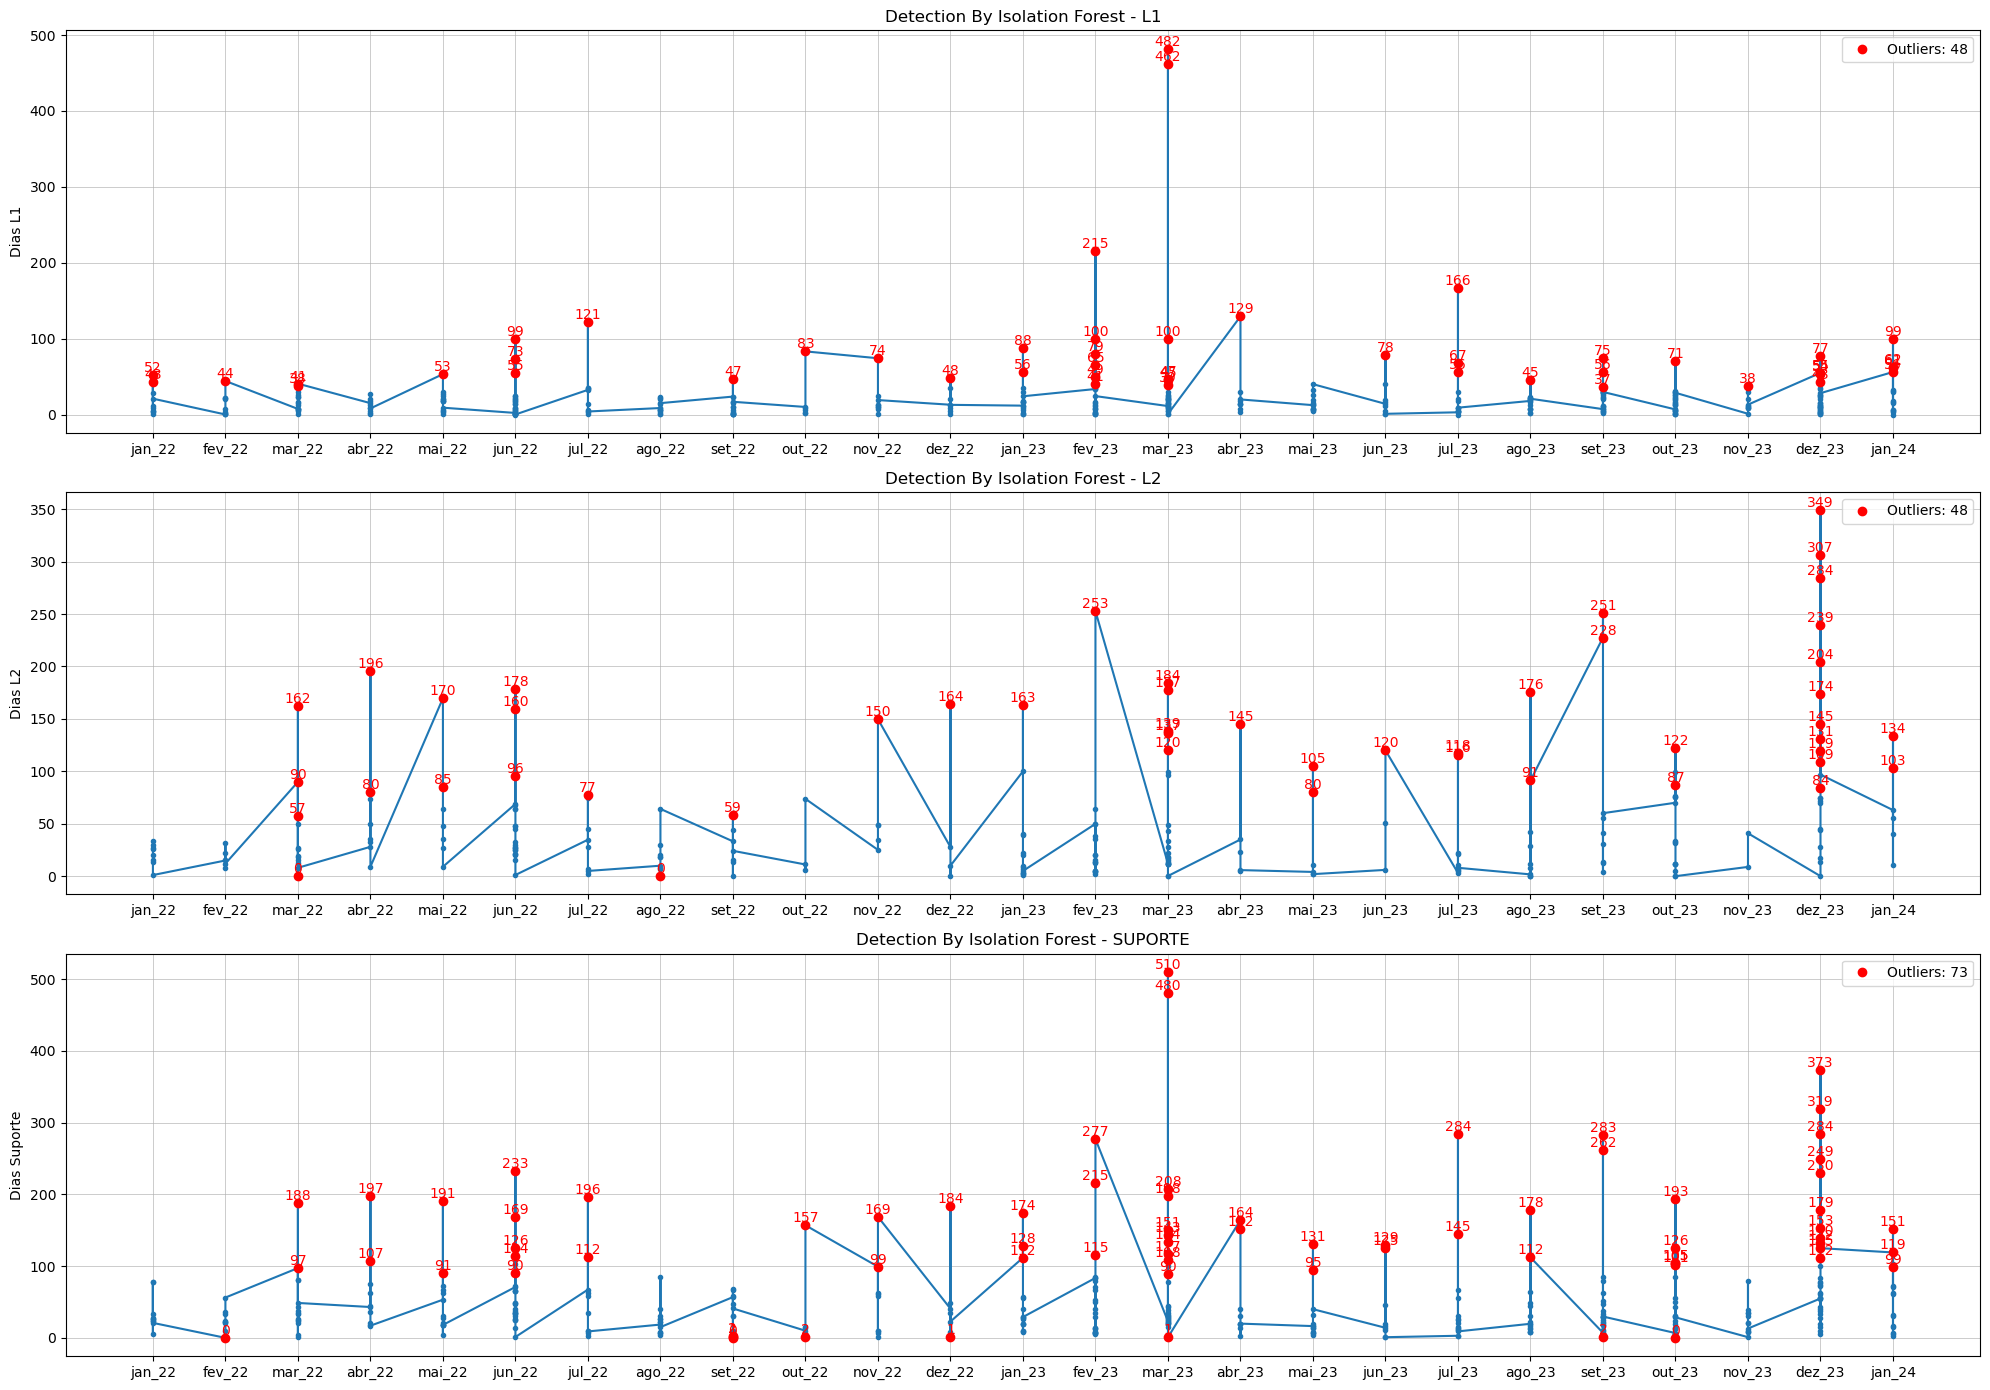

In [74]:
def plot_outliers_isolation(df, column, anomaly_column, title, ax):
    outliers = df.loc[df[anomaly_column] == -1]

    # Adicionando 'Ano_mes' como eixo x
    ax.plot(df['Mes_Ano'], df[column], marker='.')
    ax.plot(outliers['Mes_Ano'], outliers[column], 'o', color='red', label=f"Outliers: {outliers[[column]].count().values[0]}")
    ax.set_title(title)
    ax.grid(linewidth=0.5, alpha=0.9)
    ax.set_ylabel(f'Dias {column}')
    ax.legend()

    # Adicionar rótulos apenas aos outliers
    for index, row in outliers.iterrows():
        label = f"{row[column]:.0f}"  # Arredondar para uma casa decimal
        ax.text(row['Mes_Ano'], row[column], label, color='red', ha='center', va='bottom')

fig, axs = plt.subplots(3, 1, figsize=(20, 14))

# Usando a função para plotar gráficos
plot_outliers_isolation(df_L1, 'L1', 'anomaly_L1', 'Detection By Isolation Forest - L1', axs[0])
plot_outliers_isolation(df_L2, 'L2', 'anomaly_L2', 'Detection By Isolation Forest - L2', axs[1])
plot_outliers_isolation(df_Suporte, 'Suporte', 'anomaly_Suporte', 'Detection By Isolation Forest - SUPORTE', axs[2])

# Ajustar layout para evitar sobreposição de títulos
plt.tight_layout()

# Exibir os subplots
plt.show()


In [38]:
#calculo de estatisticas 3er método
stats_L1=df_L1_3erMetodo[['L1']].describe().round(1)
stats_L2=df_L2_3erMetodo[['L2']].describe().round(1)
stats_Suporte=df_Suporte_3erMetodo[['Suporte']].describe().round(1)
dataframes_list = [stats_L1, stats_L2, stats_Suporte]
statisticas_3ermetodo= pd.concat(dataframes_list,axis=1)

In [39]:
mean3ro_L1_2022 = df_L1_3erMetodo.query('Ano == 2022')['L1'].mean().round(1)
mean3ro_L1_2023 = df_L1_3erMetodo.query('Ano == 2023')['L1'].mean().round(1)
mean3ro_L1_2024 = df_L1_3erMetodo.query('Ano == 2024')['L1'].mean().round(1)

mean3ro_L2_2022 = df_L2_3erMetodo.query('Ano == 2022')['L2'].mean().round(1)
mean3ro_L2_2023 = df_L2_3erMetodo.query('Ano == 2023')['L2'].mean().round(1)
mean3ro_L2_2024 = df_L2_3erMetodo.query('Ano == 2024')['L2'].mean().round(1)

mean3ro_suporte_2022 = df_Suporte_3erMetodo.query('Ano == 2022')['Suporte'].mean().round(1)
mean3ro_suporte_2023 = df_Suporte_3erMetodo.query('Ano == 2023')['Suporte'].mean().round(1)
mean3ro_suporte_2024 = df_Suporte_3erMetodo.query('Ano == 2024')['Suporte'].mean().round(1)



dados = {
    'mean-2022': [mean3ro_L1_2023,mean3ro_L2_2022,mean3ro_suporte_2022],
    'mean-2023': [mean3ro_L1_2023,mean3ro_L2_2023,mean3ro_suporte_2023],
    'mean-2024':[mean3ro_L1_2024,mean3ro_L2_2024,mean3ro_suporte_2024]
   
}

media_anos = pd.DataFrame(dados)
novos_nomes_indices = ['L1', 'L2', 'Suporte']
media_anos3ro = media_anos.rename(index=dict(zip(media_anos.index, novos_nomes_indices)))
media_anos3ro

,mean-2022,mean-2023,mean-2024
L1,14.6,14.6,14.7
L2,28.6,26.0,42.4
Suporte,32.9,30.6,39.8


In [40]:
dados = {
       'Qtd Outliers':[df_L1[df_L1['anomaly_L1'] == -1].shape[0],
                    df_L2[df_L2['anomaly_L2'] == -1].shape[0],
                    df_Suporte[df_Suporte['anomaly_Suporte'] == -1].shape[0]],
    '%Outliers':[1-(statisticas_geral['count'].loc['L1']-df_L1[df_L1['anomaly_L1'] == -1].shape[0])/statisticas_geral['count'].loc['L1'],
                   1- (statisticas_geral['count'].loc['L2']-df_L2[df_L2['anomaly_L2'] == -1].shape[0])/statisticas_geral['count'].loc['L2'],
                    1-(statisticas_geral['count'].loc['Suporte']-df_Suporte[df_Suporte['anomaly_Suporte'] == -1].shape[0])/statisticas_geral['count'].loc['Suporte']]
}

valores_3ermetodo = pd.DataFrame(dados)

# Alterar os nomes dos índices (linhas)
novos_nomes_indices = ['L1', 'L2', 'Suporte']
valores_3ermetodo = valores_3ermetodo.rename(index=dict(zip(valores_3ermetodo.index, novos_nomes_indices)))
statisticas_3ermetodo= pd.concat([statisticas_3ermetodo.transpose(),valores_3ermetodo],axis=1)


statisticas_3ermetodo

,count,mean,std,min,25%,50%,75%,max,Qtd Outliers,%Outliers
L1,336.0,13.4,10.2,0.0,4.8,11.7,20.9,40.1,48,0.125000
L2,198.0,27.4,24.2,0.0,9.0,20.0,40.1,100.0,48,0.195122
Suporte,311.0,31.9,24.0,0.9,13.4,26.0,45.4,103.1,73,0.190104


In [41]:
statisticas_3ermetodo= pd.concat([statisticas_3ermetodo,media_anos3ro],axis=1)

#ordenar as colunas
ordem=['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'mean-2022', 'mean-2023', 'mean-2024','Qtd Outliers', '%Outliers']
statisticas_3ermetodo=statisticas_3ermetodo[ordem]

statisticas_3ermetodo

,count,mean,std,min,25%,50%,75%,max,mean-2022,mean-2023,mean-2024,Qtd Outliers,%Outliers
L1,336.0,13.4,10.2,0.0,4.8,11.7,20.9,40.1,14.6,14.6,14.7,48,0.125000
L2,198.0,27.4,24.2,0.0,9.0,20.0,40.1,100.0,28.6,26.0,42.4,48,0.195122
Suporte,311.0,31.9,24.0,0.9,13.4,26.0,45.4,103.1,32.9,30.6,39.8,73,0.190104


In [42]:
#histogram

def display_histogram_3ermetodo():

    # Criar uma figura com 3 subplots
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(11, 3.5))

    # Histograma para df_L1
    sns.histplot(df_L1_3erMetodo['L1'], bins=15, kde=True, color='skyblue', ax=ax1)
    ax1.set_title('Histograma de L1 - Sem Outliers')
    ax1.set_xlabel('Duração em Dias')
    ax1.set_ylabel('Frequência')

    # Adicionar rótulos às barras em df_L1
    for p in ax1.patches:
        ax1.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                    textcoords='offset points')

    # Histograma para df_L2
    sns.histplot(df_L2_3erMetodo['L2'], bins=15, kde=True, color='orange', ax=ax2)
    ax2.set_title('Histograma de L2 - Sem Outliers')
    ax2.set_xlabel('Duração em Dias')
    ax2.set_ylabel('Frequência')

    # Adicionar rótulos às barras em df_L2
    for p in ax2.patches:
        ax2.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                    textcoords='offset points')

    # Histograma para df_Suporte
    sns.histplot(df_Suporte_3erMetodo['Suporte'], bins=15, kde=True, color='green', ax=ax3)
    ax3.set_title('Histograma de Suporte - Sem Outliers')
    ax3.set_xlabel('Duração em Dias')
    ax3.set_ylabel('Frequência')

    # Adicionar rótulos às barras em df_Suporte
    for p in ax3.patches:
        ax3.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                    textcoords='offset points')

    # Ajustar layout para evitar sobreposição
    plt.tight_layout()


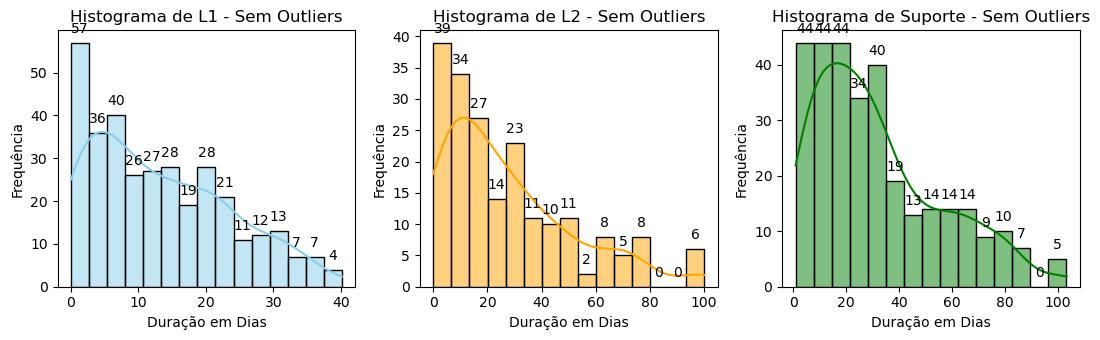

In [43]:
display_histogram_3ermetodo()

In [44]:
#stadisticas 3er metodo
statisticas_3ermetodo

,count,mean,std,min,25%,50%,75%,max,mean-2022,mean-2023,mean-2024,Qtd Outliers,%Outliers
L1,336.0,13.4,10.2,0.0,4.8,11.7,20.9,40.1,14.6,14.6,14.7,48,0.125000
L2,198.0,27.4,24.2,0.0,9.0,20.0,40.1,100.0,28.6,26.0,42.4,48,0.195122
Suporte,311.0,31.9,24.0,0.9,13.4,26.0,45.4,103.1,32.9,30.6,39.8,73,0.190104


Este tipo de método é recomendado quando temos uma distribuição assimétrica, este método e conhecido por sua robustez em lidar com distribuições assimétricas.

# 4to Método - Machine Learning k-NN (k-Nearest Neighbors) 


In [60]:
from pyod.models.knn import KNN
import numpy as np

# Função para treinar o modelo e adicionar pontuações e rótulos ao DataFrame
def treinar_modelo_e_adicionar_resultados(df, coluna_nome):
    # Remover linhas com valores NaN ou inf, se houver
    df = df.replace([np.inf, -np.inf], np.nan).dropna()

    # Treinamento do modelo
    detetor = KNN(n_neighbors=2)
    
    # Verificar se há dados disponíveis após a remoção de NaN ou inf
    if len(df) > 0:
        detetor.fit(df[coluna_nome].values.reshape(-1, 1))
        
        # Obtendo pontuações de anomalia e rótulos
        previsioes = detetor.labels_
        
        # Adicionando rótulos apenas nas linhas correspondentes ao DataFrame
        df['KNN'] = 0  # Inicializando todas as linhas com 0
        df.loc[df.index[:len(previsioes)], 'KNN'] = previsioes
    
    return df

# Treinando modelos e adicionando resultados para cada DataFrame
df_L2 = treinar_modelo_e_adicionar_resultados(df_L2, 'L2')
df_L1 = treinar_modelo_e_adicionar_resultados(df_L1, 'L1')
df_Suporte = treinar_modelo_e_adicionar_resultados(df_Suporte, 'Suporte')

# Outliers assigned a value of 1, while the other points are assigned value of 0.
# Remover os outliers com base na KNN
df_L2_4toMetodo = df_L2.query('KNN == 0')
df_L1_4toMetodo = df_L1.query('KNN == 0')
df_Suporte_4toMetodo = df_Suporte.query('KNN == 0')


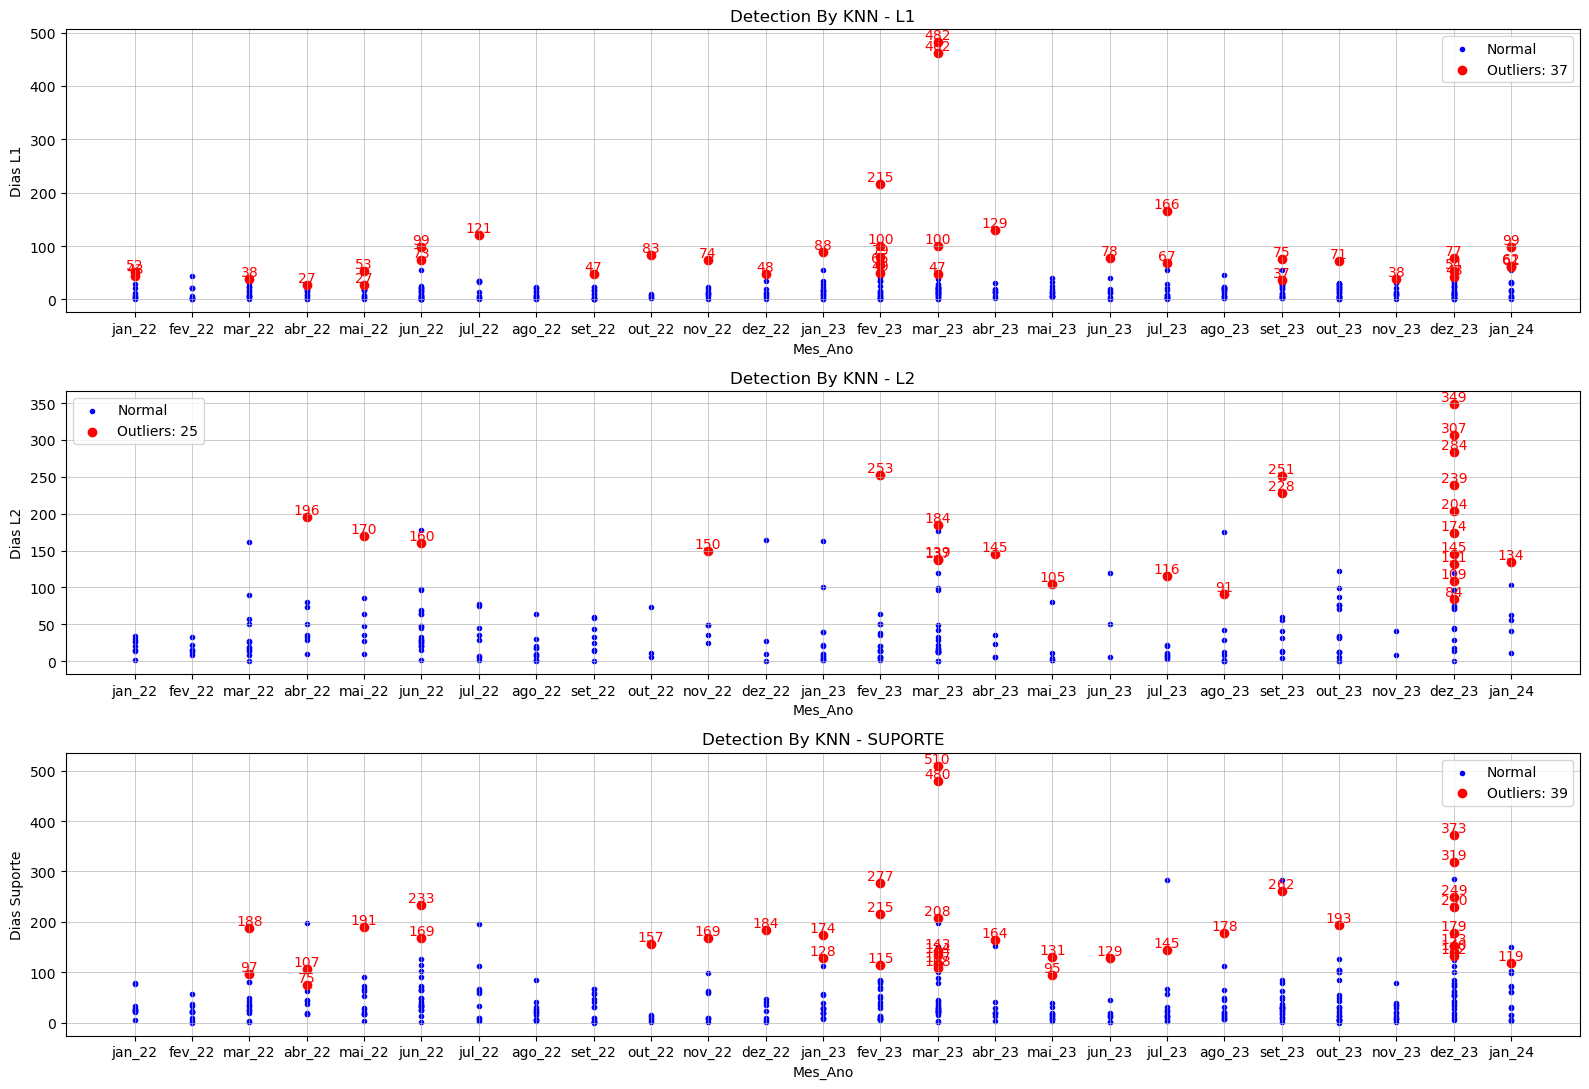

In [61]:
import matplotlib.pyplot as plt

def plot_outliers_KNN(df, column, anomaly_column, title, ax):
    outliers = df.loc[(df[anomaly_column] == 1) | (df[anomaly_column] == 1.0)]

    ax.scatter(df['Mes_Ano'], df[column], marker='.', label='Normal', color='blue')
    ax.scatter(outliers['Mes_Ano'], outliers[column], marker='o', label=f"Outliers: {outliers.shape[0]}", color='red')
    
    ax.set_title(title)
    ax.grid(linewidth=0.5, alpha=0.9)
    ax.set_ylabel(f'Dias {column}')
    ax.set_xlabel('Mes_Ano')
    ax.legend()

    # Adicionar rótulos apenas aos outliers
    for index, row in outliers.iterrows():
        label = f"{row[column]:.0f}"  # Arredondar para uma casa decimal
        ax.text(row['Mes_Ano'], row[column], label, color='red', ha='center', va='bottom')

# Criar a figura com subplots
fig, axs = plt.subplots(3, 1, figsize=(16, 11))

# Usar a função para plotar gráficos
plot_outliers_KNN(df_L1, 'L1', 'KNN', 'Detection By KNN - L1', axs[0])
plot_outliers_KNN(df_L2, 'L2', 'KNN', 'Detection By KNN - L2', axs[1])
plot_outliers_KNN(df_Suporte, 'Suporte', 'KNN', 'Detection By KNN - SUPORTE', axs[2])
plt.tight_layout()

# Exibir os subplots
plt.show()


In [75]:
#calculo de estatisticas 4to método
stats_L1=df_L1_4toMetodo[['L1']].describe().round(1)
stats_L2=df_L2_4toMetodo[['L2']].describe().round(1)
stats_Suporte=df_Suporte_4toMetodo[['Suporte']].describe().round(1)
dataframes_list = [stats_L1, stats_L2, stats_Suporte]
statisticas_4tometodo= pd.concat(dataframes_list,axis=1)
statisticas_4tometodo=statisticas_4tometodo.transpose()
statisticas_4tometodo

,count,mean,std,min,25%,50%,75%,max
L1,347.0,14.6,12.2,0.0,5.0,12.1,21.3,56.0
L2,221.0,35.6,36.8,0.0,10.0,24.2,49.0,178.1
Suporte,345.0,39.4,41.1,0.0,13.2,27.8,55.0,284.1


In [76]:
mean3ro_L1_2022 = df_L1_4toMetodo.query('Ano == 2022')['L1'].mean().round(1)
mean3ro_L1_2023 = df_L1_4toMetodo.query('Ano == 2023')['L1'].mean().round(1)
mean3ro_L1_2024 = df_L1_4toMetodo.query('Ano == 2024')['L1'].mean().round(1)

mean3ro_L2_2022 = df_L2_4toMetodo.query('Ano == 2022')['L2'].mean().round(1)
mean3ro_L2_2023 = df_L2_4toMetodo.query('Ano == 2023')['L2'].mean().round(1)
mean3ro_L2_2024 = df_L2_4toMetodo.query('Ano == 2024')['L2'].mean()

mean3ro_suporte_2022 = df_Suporte_4toMetodo.query('Ano == 2022')['Suporte'].mean().round(1)
mean3ro_suporte_2023 = df_Suporte_4toMetodo.query('Ano == 2023')['Suporte'].mean().round(1)
mean3ro_suporte_2024 = df_Suporte_4toMetodo.query('Ano == 2024')['Suporte'].mean().round(1)



dados = {
    'mean-2022': [mean3ro_L1_2023,mean3ro_L2_2022,mean3ro_suporte_2022],
    'mean-2023': [mean3ro_L1_2023,mean3ro_L2_2023,mean3ro_suporte_2023],
    'mean-2024':[mean3ro_L1_2024,mean3ro_L2_2024,mean3ro_suporte_2024]
   
}

media_anos = pd.DataFrame(dados)
novos_nomes_indices = ['L1', 'L2', 'Suporte']
media_anos4to = media_anos.rename(index=dict(zip(media_anos.index, novos_nomes_indices)))
media_anos4to

,mean-2022,mean-2023,mean-2024
L1,16.2,16.2,18.2
L2,35.7,34.7,54.5
Suporte,36.7,40.4,52.0


In [77]:
dados = {
       'Qtd Outliers':[df_L1[df_L1['KNN'] == 1].shape[0],
                    df_L2[df_L2['KNN'] == 1.0].shape[0],
                    df_Suporte[df_Suporte['KNN'] == 1.0].shape[0]],
    '%Outliers':[1-(statisticas_geral['count'].loc['L1']-df_L1[df_L1['KNN'] == 1].shape[0])/statisticas_geral['count'].loc['L1'],
                   1- (statisticas_geral['count'].loc['L2']-df_L2[df_L2['KNN'] == 1.0].shape[0])/statisticas_geral['count'].loc['L2'],
                    1-(statisticas_geral['count'].loc['Suporte']-df_Suporte[df_Suporte['KNN'] == 1.0].shape[0])/statisticas_geral['count'].loc['Suporte']]
}

valores_4tometodo = pd.DataFrame(dados)

# Alterar os nomes dos índices (linhas)
novos_nomes_indices = ['L1', 'L2', 'Suporte']
valores_4tometodo = valores_4tometodo.rename(index=dict(zip(valores_4tometodo.index, novos_nomes_indices)))
statisticas_4tometodo= pd.concat([statisticas_4tometodo,valores_4tometodo],axis=1)


statisticas_4tometodo

,count,mean,std,min,25%,50%,75%,max,Qtd Outliers,%Outliers
L1,347.0,14.6,12.2,0.0,5.0,12.1,21.3,56.0,37,0.096354
L2,221.0,35.6,36.8,0.0,10.0,24.2,49.0,178.1,25,0.101626
Suporte,345.0,39.4,41.1,0.0,13.2,27.8,55.0,284.1,39,0.101562


In [78]:
statisticas_4tometodo= pd.concat([statisticas_4tometodo,media_anos4to],axis=1)

#ordenar as colunas
ordem=['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'mean-2022', 'mean-2023', 'mean-2024','Qtd Outliers', '%Outliers']
statisticas_4tometodo=statisticas_4tometodo[ordem]

statisticas_4tometodo

,count,mean,std,min,25%,50%,75%,max,mean-2022,mean-2023,mean-2024,Qtd Outliers,%Outliers
L1,347.0,14.6,12.2,0.0,5.0,12.1,21.3,56.0,16.2,16.2,18.2,37,0.096354
L2,221.0,35.6,36.8,0.0,10.0,24.2,49.0,178.1,35.7,34.7,54.5,25,0.101626
Suporte,345.0,39.4,41.1,0.0,13.2,27.8,55.0,284.1,36.7,40.4,52.0,39,0.101562


In [79]:
#histogram

def display_histogram_4tometodo():

    # Criar uma figura com 3 subplots
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(11, 3.5))

    # Histograma para df_L1
    sns.histplot(df_L1_4toMetodo['L1'], bins=15, kde=True, color='skyblue', ax=ax1)
    ax1.set_title('Histograma de L1 - Sem Outliers')
    ax1.set_xlabel('Duração em Dias')
    ax1.set_ylabel('Frequência')

    # Adicionar rótulos às barras em df_L1
    for p in ax1.patches:
        ax1.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                    textcoords='offset points')

    # Histograma para df_L2
    sns.histplot(df_L2_4toMetodo['L2'], bins=15, kde=True, color='orange', ax=ax2)
    ax2.set_title('Histograma de L2 - Sem Outliers')
    ax2.set_xlabel('Duração em Dias')
    ax2.set_ylabel('Frequência')

    # Adicionar rótulos às barras em df_L2
    for p in ax2.patches:
        ax2.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                    textcoords='offset points')

    # Histograma para df_Suporte
    sns.histplot(df_Suporte_4toMetodo['Suporte'], bins=15, kde=True, color='green', ax=ax3)
    ax3.set_title('Histograma de Suporte - Sem Outliers')
    ax3.set_xlabel('Duração em Dias')
    ax3.set_ylabel('Frequência')

    # Adicionar rótulos às barras em df_Suporte
    for p in ax3.patches:
        ax3.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                    textcoords='offset points')

    # Ajustar layout para evitar sobreposição
    plt.tight_layout()


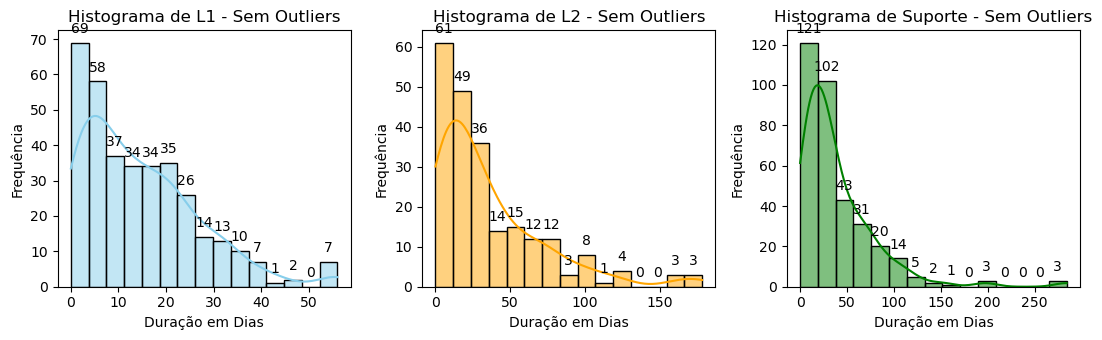

In [80]:
#DEPOIS
display_histogram_4tometodo()

## CONCLUSÃO

In [82]:
statisticas_geral

,count,mean,std,min,25%,50%,75%,max,mean-2022,mean-2023,mean-2024
L1,384.0,22.4,40.3,0.0,5.8,14.0,25.6,482.0,16.3,26.0,29.3
L2,246.0,50.2,59.9,0.0,12.0,28.0,68.6,349.0,40.9,56.5,67.7
Suporte,384.0,54.6,66.9,0.0,14.2,30.8,67.4,510.1,44.9,60.9,56.4


In [83]:
#METODO 1-  Intervalo Interquartil
# -O IQR é menos sensível a outliers, isso torna robusto em situações em que existem valores extremos. 
# -Como o método se concentra no quartil não é influenciado pela forma exacta da distribuição.
statisticas_1ermetodo

,count,mean,std,min,25%,50%,75%,max,mean-2022,mean-2023,mean-2024,Lim Inferior,Lim Superior,Qtd Outliers,%Outliers
L1,332.0,13.1,9.9,0.0,4.8,11.4,20.8,35.2,14.1,14.1,14.7,-23.9,35.5,52.0,0.135417
L2,207.0,28.6,25.0,0.0,9.0,21.0,43.4,96.9,30.9,26.1,42.4,-72.9,96.9,39.0,0.158537
Suporte,318.0,30.5,23.3,0.0,11.5,25.1,43.2,90.7,31.8,29.3,34.0,-65.6,94.0,66.0,0.171875


In [84]:
#METODO 2 - Z_Core
 # Este tipo de método é recomendado quando temos uma distribuição totalmente normal ou proxima a ela. 
# Este método envolve a média e o desvio padrão, se houver outliers extremos, 
# especialmente em distribuição assimétricas como as que temos, pode afetar significativqamente a estimação dos parametros.
statisticas_2dometodo

,count,mean,std,min,25%,50%,75%,max,mean-2022,mean-2023,mean-2024,Lim Inferior,Lim Superior,Qtd Outliers,%Outliers
L1,380.0,19.2,20.2,0.0,5.7,13.9,25.0,129.3,20.4,20.4,29.3,-98.5,143.3,4.0,0.010417
L2,240.0,44.4,47.7,0.0,11.1,27.0,64.0,227.6,40.9,46.2,67.7,-129.5,229.9,6.0,0.024390
Suporte,375.0,47.7,48.7,0.0,14.0,30.1,64.7,249.4,44.9,49.0,56.4,-146.1,255.3,9.0,0.023438


In [85]:
#METODO 3 - Machine Learning Isolation Forest
# Este tipo de método é recomendado quando temos uma distribuição assimétrica, este método e conhecido por sua robustez 
# em lidar com distribuições assimétricas. 
statisticas_3ermetodo

,count,mean,std,min,25%,50%,75%,max,mean-2022,mean-2023,mean-2024,Qtd Outliers,%Outliers
L1,336.0,13.4,10.2,0.0,4.8,11.7,20.9,40.1,14.6,14.6,14.7,48,0.125000
L2,198.0,27.4,24.2,0.0,9.0,20.0,40.1,100.0,28.6,26.0,42.4,48,0.195122
Suporte,311.0,31.9,24.0,0.9,13.4,26.0,45.4,103.1,32.9,30.6,39.8,73,0.190104


In [86]:
#METODO 4 - Machine Learning KNN
statisticas_4tometodo

,count,mean,std,min,25%,50%,75%,max,mean-2022,mean-2023,mean-2024,Qtd Outliers,%Outliers
L1,347.0,14.6,12.2,0.0,5.0,12.1,21.3,56.0,16.2,16.2,18.2,37,0.096354
L2,221.0,35.6,36.8,0.0,10.0,24.2,49.0,178.1,35.7,34.7,54.5,25,0.101626
Suporte,345.0,39.4,41.1,0.0,13.2,27.8,55.0,284.1,36.7,40.4,52.0,39,0.101562
